In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

In [2]:
np.cov(A, rowvar = False, bias = True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [3]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [4]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar = False, bias = True)
    print('Covariance matrix:\n', ACov)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(10, 10)
    
    ax0 = plt.subplot(2, 2, 1)
    
    # Choose colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap = cmap, vmin = 0)
    
    ax1 = plt.subplot(2, 2, 2)
    
    # Data can also include colors
    if data.shape[1] == 3:
        c = data[:, 2]
    else:
        c = "#0A98BE"
    ax1.scatter(data[:, 0], data[:, 1], c = c, s = 40)
    
    # Remove the top and right axes from data plot. 
    

In [5]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

In [6]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

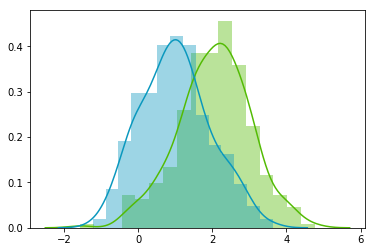

In [7]:
sns.distplot(A[:, 0], color = "#53BB04")
sns.distplot(A[:, 1], color = "#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


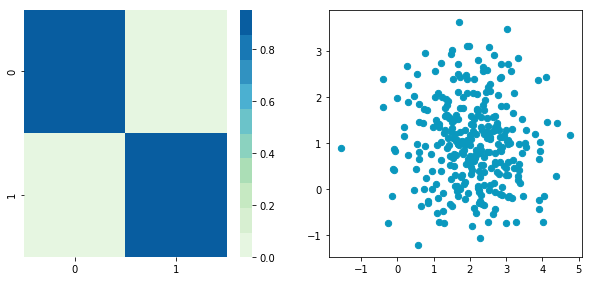

In [8]:
plotDataAndCov(A)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


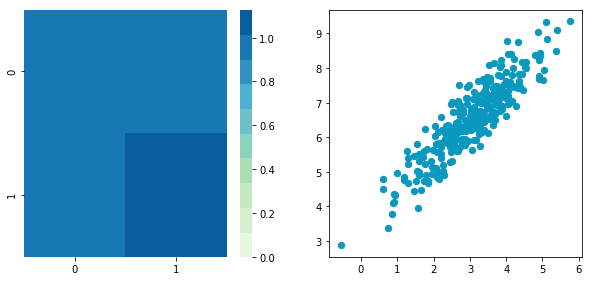

In [9]:
np.random.seed(1234)
b1 = np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

In [10]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX


Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


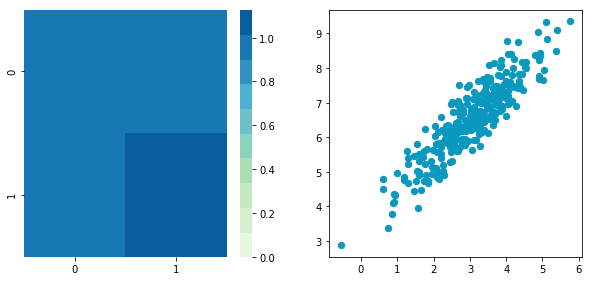

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


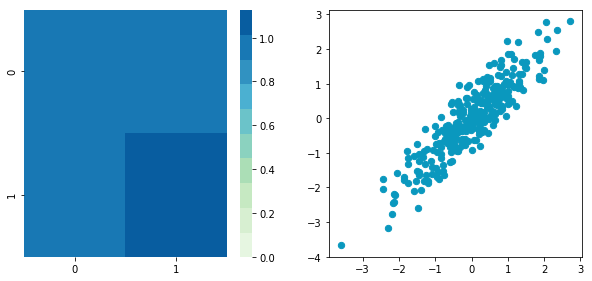

In [11]:
BCentered = center(B)

print("Before:\n\n")

plotDataAndCov(B)
plt.show()
plt.close()

print("After:\n\n")

plotDataAndCov(BCentered)
plt.show()
plt.close()

In [12]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


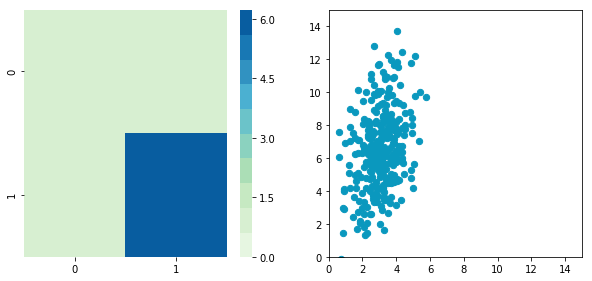

In [13]:
np.random.seed(1234)
c1 = np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


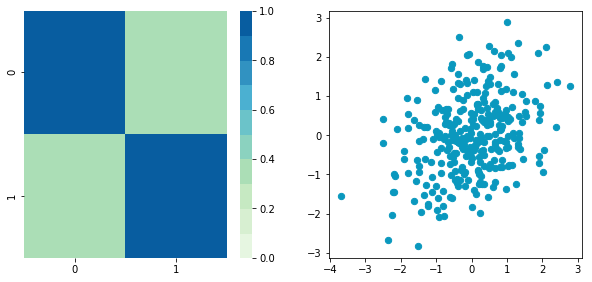

In [14]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


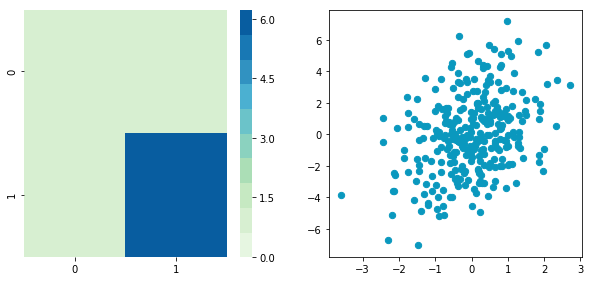

In [15]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


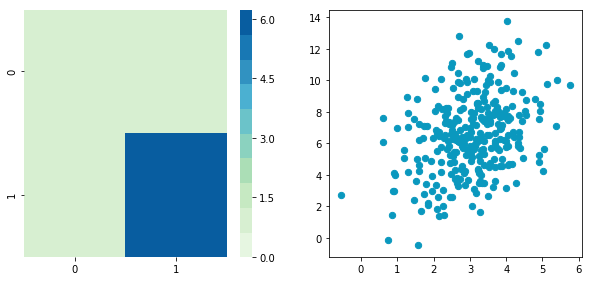

Covariance matrix:
 [[8.21222171e-01 8.28966525e-17]
 [8.28966525e-17 6.35579346e+00]]


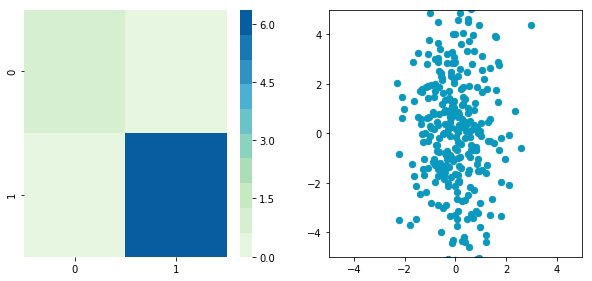

In [16]:
def decorrelate(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    
    # Calculate eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X and return
    return X.dot(eigVecs)

plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
plt.close()

Covariance matrix:
 [[9.99987823e-01 2.51650552e-17]
 [2.51650552e-17 9.99998427e-01]]


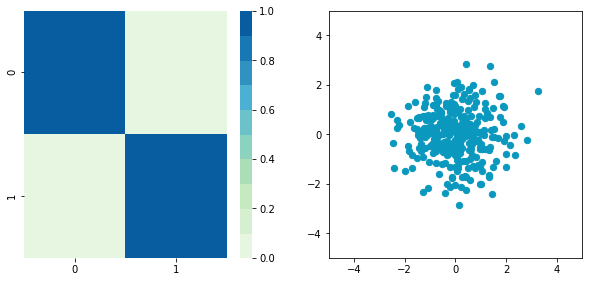

In [17]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    
    # Find eigenvalues and eigenvectors
    eigVals, eigVecs = np.linalg.eig(cov)
    
    # Apply eigenvectors to X
    decorrelated = X.dot(eigVecs)
    
    # Rescale the data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
plt.close()

In [18]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

Using TensorFlow backend.


(50000, 32, 32, 3)

In [19]:
X = X_train[:1000]
print(X.shape)

(1000, 32, 32, 3)


In [20]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


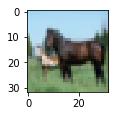

In [21]:
def plotImage(X):
    plt.figure(figsize = (1.5, 1.5))
    plt.imshow(X.reshape(32, 32, 3))
    plt.show()
    plt.close()
    
plotImage(X[12, :])

In [23]:
X_norm = X / 255
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [24]:
X_norm.mean(axis = 0).shape

(3072,)

In [25]:
X_norm.mean(axis = 0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [26]:
X_norm = X_norm - X_norm.mean(axis = 0)
X_norm.mean(axis = 0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [27]:
cov = np.cov(X_norm, rowvar = True)
U, S, V = np.linalg.svd(cov)
print(U.shape, S.shape)

(1000, 1000) (1000,)


In [28]:
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[8.15846654e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.68234845e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.41075267e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.92727365e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.52614473e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.35907202e-15]]

shape: (1000, 1000)


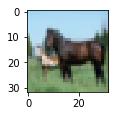

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


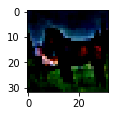

In [30]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

plotImage(X[12, :])
plotImage(X_ZCA[12, :])

In [31]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

print('min: ', X_ZCA_rescaled.min())
print('max: ', X_ZCA_rescaled.max())

min:  0.0
max:  1.0


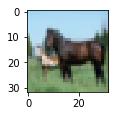

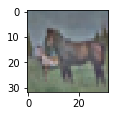

In [32]:
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])